**Importación de librerías**

In [3]:
# Cargo las librerías
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from columns_to_keep import C2K
from type_to_fix import T2F

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Carga de la tabla de metadata**


In [ ]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'datadump-20150801-20171219.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
df = pd.read_csv(full_data_file_name)
display(df.shape)

In [7]:
# Remuevo espacios al inicio y final del nombre de la columna
df.columns = [column.strip() for column in df.columns]

# Tomo solo las columnas que vamos a necesitar
df = df[C2K]

# Se corrigen los tipos de los datos 
df = df.astype(T2F)

display(df.shape)

(63265, 39)

**Consigna:** 

Elegir (al menos) tres variables, las cuales crean que pueden estar correlacionadas con la satisfacción del estudiante al terminar el diálogo.


**Pasos:**
1. Las variables seleccionadas son: student_rating, wait_time, length_of_session, avg_tutor_response_time  y feedback_score.

1. Se eliminaron los valores NA de las variables student_rating, wait_time, length_of_session  y feedback_score. 
 
1. Graficar 

1. Calcular la correlación con la fórmula de Spearman 

In [8]:
# 1 y 2 
df_sinNA = df.dropna(subset=['student_rating', 'wait_time', 'length_of_session', 'feedback_score', 'avg_tutor_response_time'])
df_graficos = df_sinNA.loc[:, ["student_rating", "wait_time", "feedback_score", "length_of_session", "avg_tutor_response_time"]]

## **¿Existe alguna variable que influya sobre la satisfacción de los estudiantes?**

#### Para verificar si existe alguna variable que influya sobre la satisfacción de los estudiantes  en primer lugar, realizaré algunos gráficos y luego calcularé el índice de correlación de SpearmanR. Las variables elegidas fueron cuatro: student_rating y las variables wait_time, lenght_of_session y  avg_tutor_time_response.

 

## **Gráfico de regresión lineal entre student_rating y wait_time**

In [9]:
# convierto de secs a minutos  
df_graficos['wait_time'] = (df_sinNA['wait_time'] > 0.0)
df_graficos['wait_time'] = (df_sinNA['wait_time'] / 60)
df_graficos['wait_time'] = round(df_graficos['wait_time'],1)
print(df_graficos['wait_time'])

0        0.8
2        0.2
4        0.1
5        0.1
7        0.1
        ... 
63260    0.3
63261    0.2
63262    0.1
63263    0.1
63264    0.2
Name: wait_time, Length: 45444, dtype: float64


TypeError: ignored

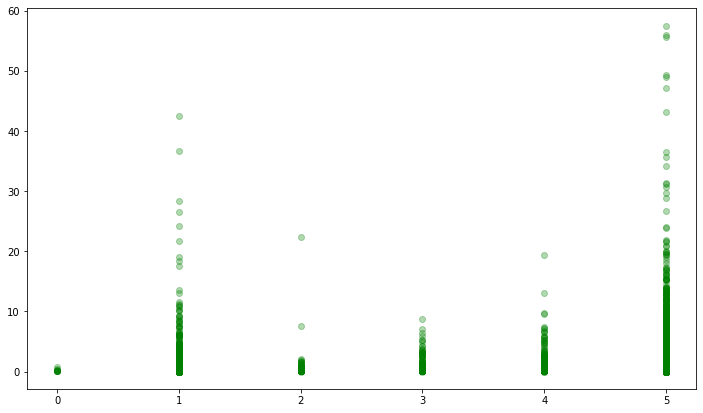

In [10]:
# 4- Gráfico de regresión lineal entre student_rating y wait_time
plt.figure(figsize=(12,7))
seaborn.regplot(x= 'student_rating', y= 'wait_time', data= df_graficos ,scatter_kws={'color':'green', 'alpha':0.3},line_kws={'color':'red'})
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y el tiempo de espera?',
             fontsize=16, weight="bold")
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('tiempo de espera (en minutos)')
seaborn.despine()
plt.show()
# plt.xlim([-1, 6])

**Otro tipo de gráfico entre student_rating y wait_time**

In [1]:
# 4-
plt.figure(figsize=(12,7))
seaborn.jointplot(x= 'student_rating', y= 'wait_time', data= df_graficos, kind="reg",
                 line_kws={'color':'green'},
                 scatter_kws={'alpha': 0.33})
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y el tiempo de espera?',fontsize=16, weight="bold", y=1.05)
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('tiempo de espera (en min)')
seaborn.despine()
plt.show()

NameError: ignored

## **Scatterplot entre student_rating y wait_time.**

In [ ]:
plt.figure(figsize=(12,7))
seaborn.scatterplot(data= df_graficos, x="student_rating", y="wait_time")
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y el tiempo de espera?',
             fontsize=16, weight="bold")
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('tiempo de espera (en min)')
seaborn.despine()
plt.show()
                 

## **Gráfico de regresión lineal entre student_rating y length_of_session**

In [ ]:
# 4- Gráfico de regresión lineal entre student_rating y length_of_session
df_graficos['length_of_session'] = df_sinNA[df_sinNA.length_of_session  > 0.0]
df_graficos['length_of_session'] = (df_sinNA['length_of_session'] / 60)
df_graficos['length_of_session'] = round(df_graficos['length_of_session'],1)
print(df_graficos['length_of_session'])


In [ ]:
# en el eje y no toma los valores correspondientes, no sé por qué??
plt.figure(figsize=(12,7))
seaborn.regplot(x="student_rating", y= "length_of_session", data= df_graficos,
            scatter_kws={'color':'green', 'alpha':0.3},
            line_kws={'color':'red'})
plt.title('¿Existe relación entre el puntaje asignado a los profesores\n  y la duración de la sesión?',fontsize=16, weight="bold")
plt.xlabel('puntaje asignado al tutor')
plt.ylabel('duración de la sesión (en minutos)')
seaborn.despine()
plt.show()

##**Scatterplot entre el student_rating y el length_of_session**

In [ ]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(data= df_graficos, x="student_rating", y="length_of_session")
             

## **Gráfico pairplot entre student_rating y las variables elegidas**

In [ ]:
df_pairplot = df_sinNA.loc[:, ["student_rating", "wait_time", "feedback_score", "length_of_session", "avg_tutor_response_time"]]
#plt.title('¿Existe relación entre el puntaje asignado a los profesores\n, el tiempo esperado, la duración de la sesión y el feedback_score?',fontsize=16, weight="bold")
plt.figure(figsize=(12,7))
seaborn.pairplot(data= df_pairplot)


## **Scatterplot entre el student_rating y el tiempo promedio de respuesta**

In [ ]:
plt.figure(figsize=(12,7))
seaborn.scatterplot(data=df, x='student_rating', y='avg_tutor_response_time')
plt.xlabel('student_rating', fontsize=15)
plt.ylabel('tiempo promedio de respuesta', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)  #avg_tutor_response_time

## **5- Cálculo de coeficientes de correlación**


In [ ]:
from scipy.stats import spearmanr

In [ ]:
dfspearman = df[["student_rating", "wait_time", "feedback_score", "length_of_session", "avg_tutor_response_time"]].dropna().sort_values('student_rating')
dfspearman

## **¿Existe correlación entre las variables student_rating y wait_time?** 

In [ ]:
spearman_p2 = spearmanr(dfspearman['student_rating'],dfspearman['wait_time'])
spearman_p2

##  **¿Existe correlación entre las variables student_rating y feedback_score?**

In [ ]:
spearman_p = spearmanr(dfspearman['student_rating'],dfspearman['feedback_score'])
spearman_p

## **¿Existe correlación entre las variables student_rating y length_of_session?**


In [ ]:
spearman_p3 = spearmanr(dfspearman['student_rating'],dfspearman['length_of_session'])
spearman_p3

## **¿Existe correlación entre las variables student_rating y avg_tutor_response_time?**

In [ ]:
spearman_p4 = spearmanr(dfspearman['student_rating'],dfspearman['avg_tutor_response_time'])
spearman_p4

### **Conclusión:**
 
Hice algunos gráficos entre student_rating y las variables wait_time, lenght_of_session y  avg_tutor_time_response, luego calculé el coeficiente de Spearman entre ese par de variables. Luego de verificar si existía alguna correlación entre  las mismas, se llega a la conclusión de que no existe ninguna relación entre esas variables que pueda influir de manera significativa sobre la satisfacción del estudiante. 

 
